In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
naijacovid = pd.read_csv('Naijacovid.csv')
naijacovid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"69,698","10,704","58,529",465
1,FCT,"20,339",367,"19,799",173
2,Kaduna,"9,203",12,"9,125",66
3,Plateau,"9,135",23,"9,055",57
4,Rivers,"9,068","1,046","7,913",109


In [3]:
naijacovid.replace(',','', regex=True, inplace=True)

In [4]:
naijacovid['No. of Cases (Lab Confirmed)'] = pd.to_numeric(naijacovid['No. of Cases (Lab Confirmed)'])
naijacovid['No. of Cases (on admission)'] = pd.to_numeric(naijacovid['No. of Cases (on admission)'])
naijacovid['No. Discharged'] = pd.to_numeric(naijacovid['No. Discharged'])

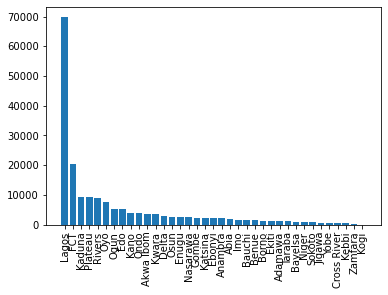

In [5]:
#plt.figure(figsize=(15,10))
plt.bar(naijacovid['States Affected'], naijacovid['No. of Cases (Lab Confirmed)'])
plt.xticks(rotation=90);

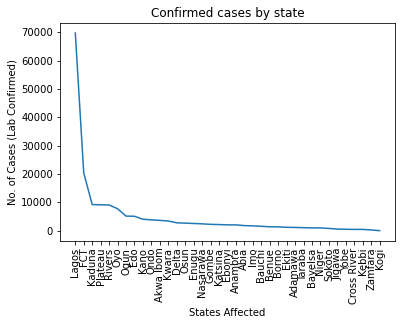

In [6]:
#plt.figure(figsize=(15,10))
sns.lineplot(x= naijacovid['States Affected'], y = naijacovid['No. of Cases (Lab Confirmed)'], ci=None)
plt.title('Confirmed cases by state')
plt.xticks(rotation=90);

In [7]:
#weather, population, health workers, wealth, rural/urban, cases per 1000, gdp, education

In [8]:
#https://covid19.ncdc.gov.ng/

In [9]:
population = pd.read_csv('Naijapopulation.csv')

In [10]:
population.replace(',','', regex=True, inplace=True)

In [11]:
population.replace('State','', regex=True, inplace=True)

In [12]:
population.replace('Federal Capital Territory','FCT', regex=True, inplace=True)

In [13]:
population['Population (2016)'] = pd.to_numeric(population['Population (2016)'])

In [14]:
naijacovid.rename(columns = {'States Affected':'State'}, inplace = True)

In [15]:
population['State'].values

array(['Kano ', 'Lagos ', 'Kaduna ', 'Oyo ', 'Katsina ', 'Rivers ',
       'Bauchi ', 'Borno ', 'Jigawa ', 'Benue ', 'Delta ', 'Niger ',
       'Anambra ', 'Akwa Ibom ', 'Imo ', 'Ogun ', 'Sokoto ', 'Osun ',
       'Ondo ', 'Zamfara ', 'Kogi ', 'Kebbi ', 'Enugu ', 'Adamawa ',
       'Edo ', 'Plateau ', 'Cross River ', 'Abia ', 'FCT', 'Yobe ',
       'Ekiti ', 'Gombe ', 'Kwara ', 'Taraba ', 'Ebonyi ', 'Nasarawa ',
       'Bayelsa '], dtype=object)

In [16]:
population['State'] = population['State'].str.rstrip()

In [17]:
naijacovid = naijacovid.merge(population, on='State')

In [18]:
naijacovid.rename(columns = {'State':'States Affected', 'Rank ':'Population Rank'}, inplace = True)

In [19]:
naijacovid.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
Population Rank                  int64
Population (2016)                int64
dtype: object

In [20]:
naijacovid['Cases per thousand'] = (naijacovid['No. of Cases (Lab Confirmed)']/naijacovid['Population (2016)'])*1000

In [21]:
naijacovid['Percentage covid cases'] = (naijacovid['No. of Cases (Lab Confirmed)']/naijacovid['Population (2016)'])*100

In [22]:
#population density/cases per thousand

In [23]:
land = pd.read_csv('Landmass.csv')

In [24]:
land.replace(',','', regex=True, inplace=True)
land.replace(' State','', regex=True, inplace=True)
land.replace('Federal Capital Territory','FCT', regex=True, inplace=True)

In [25]:
land['Area(square km)'] = pd.to_numeric(land['Area(square km)'])

In [26]:
land.head()

,Rank,State,Area(square km)
0,1,Niger,76363
1,2,Borno,70898
2,3,Taraba,54473
3,4,Bauchi,49119
4,5,Kaduna,46053


In [27]:
naijacovid = naijacovid.merge(land, left_on='States Affected', right_on='State')

In [28]:
naijacovid.drop(columns=['Rank', 'State'], inplace=True)

In [29]:
naijacovid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population Rank,Population (2016),Cases per thousand,Percentage covid cases,Area(square km)
0,Lagos,69698,10704,58529,465,2,12000598,5.807877,0.580788,3345
1,FCT,20339,367,19799,173,29,3564126,5.706588,0.570659,7315
2,Kaduna,9203,12,9125,66,3,8252366,1.115195,0.111520,46053
3,Plateau,9135,23,9055,57,26,4200442,2.174771,0.217477,30913
4,Rivers,9068,1046,7913,109,6,7303924,1.241524,0.124152,11077


In [30]:
naijacovid['Density'] = naijacovid['Population (2016)']/naijacovid['Area(square km)']

In [31]:
naijacovid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population Rank,Population (2016),Cases per thousand,Percentage covid cases,Area(square km),Density
0,Lagos,69698,10704,58529,465,2,12000598,5.807877,0.580788,3345,3587.622720
1,FCT,20339,367,19799,173,29,3564126,5.706588,0.570659,7315,487.235270
2,Kaduna,9203,12,9125,66,3,8252366,1.115195,0.111520,46053,179.192800
3,Plateau,9135,23,9055,57,26,4200442,2.174771,0.217477,30913,135.879468
4,Rivers,9068,1046,7913,109,6,7303924,1.241524,0.124152,11077,659.377449


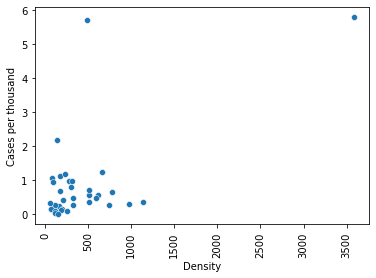

In [32]:
#plt.figure(figsize=(10,10))
sns.scatterplot(x= naijacovid['Density'], y = naijacovid['Cases per thousand'], ci=None)
#plt.title('Confirmed cases by state')
plt.xticks(rotation=90);

In [33]:
poverty = pd.read_csv('naijapoverty.csv')

In [34]:
poverty.head()

,State,Poverty rate(percent)
0,Borno,90.00
1,Sokoto,87.73
2,Taraba,87.72
3,Jigawa,87.02
4,Ebonyi,79.76


In [35]:
poverty.replace('Federal Capital Territory','FCT', regex=True, inplace=True)

In [36]:
poverty.dtypes

State                     object
Poverty rate(percent)    float64
dtype: object

In [37]:
poverty['Poverty rate(percent)'] = pd.to_numeric(poverty['Poverty rate(percent)'], downcast="float")

In [38]:
naijacovid = naijacovid.merge(poverty, left_on='States Affected', right_on='State')

In [39]:
naijacovid.drop(columns=['State'], inplace=True)

In [40]:
naijacovid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population Rank,Population (2016),Cases per thousand,Percentage covid cases,Area(square km),Density,Poverty rate(percent)
0,Lagos,69698,10704,58529,465,2,12000598,5.807877,0.580788,3345,3587.622720,4.500000
1,FCT,20339,367,19799,173,29,3564126,5.706588,0.570659,7315,487.235270,38.700001
2,Kaduna,9203,12,9125,66,3,8252366,1.115195,0.111520,46053,179.192800,43.500000
3,Plateau,9135,23,9055,57,26,4200442,2.174771,0.217477,30913,135.879468,55.099998
4,Rivers,9068,1046,7913,109,6,7303924,1.241524,0.124152,11077,659.377449,23.900000


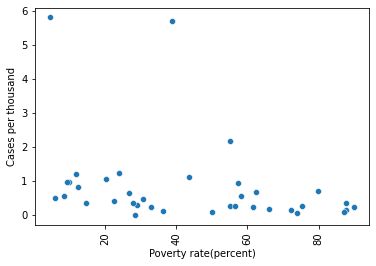

In [41]:
#plt.figure(figsize=(10,10))
sns.scatterplot(x= naijacovid['Poverty rate(percent)'], y = naijacovid['Cases per thousand'], ci=None)
#plt.title('Confirmed cases by state')
plt.xticks(rotation=90);

In [42]:
literacy = pd.read_csv('Naijaliteracy.csv')
literacy.head()

,Rank,State,Literacy rate(percent)
0,1,Imo,96
1,2,Lagos,96
2,3,Ekiti,96
3,4,Rivers,96
4,5,Abia,94


In [43]:
literacy['State'] = literacy['State'].str.rstrip()

In [44]:
literacy['State'].values

array(['Imo', 'Lagos', 'Ekiti', 'Rivers', 'Abia', 'Akwa Ibom', 'Anambra',
       'Osun', 'Edo', 'Enugu', 'Cross River', 'Delta', 'Bayelsa', 'Kogi',
       'Ogun', 'Ondo', 'Oyo', 'FCT', 'Ebonyi', 'Benue', 'Taraba', 'Kwara',
       'Plateau', 'Nassarawa', 'Adamawa', 'Kaduna', 'Kano', 'Gombe',
       'Jigawa', 'Borno', 'Niger', 'Kebbi', 'Bauchi', 'Zamfara', 'Sokoto',
       'Katsina', 'Yobe'], dtype=object)

In [45]:
naijacovid = naijacovid.merge(literacy, left_on='States Affected', right_on='State')

In [46]:
naijacovid.drop(columns=['State'], inplace=True)

In [47]:
naijacovid.dtypes

States Affected                  object
No. of Cases (Lab Confirmed)      int64
No. of Cases (on admission)       int64
No. Discharged                    int64
No. of Deaths                     int64
Population Rank                   int64
Population (2016)                 int64
Cases per thousand              float64
Percentage covid cases          float64
Area(square km)                   int64
Density                         float64
Poverty rate(percent)           float32
Rank                              int64
Literacy rate(percent)            int64
dtype: object

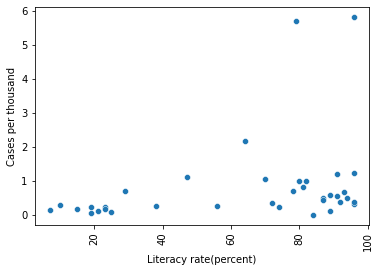

In [48]:
sns.scatterplot(x= naijacovid['Literacy rate(percent)'], y = naijacovid['Cases per thousand'], ci=None)
plt.xticks(rotation=90);

# Linear Regression

C:\Users\Greatness\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


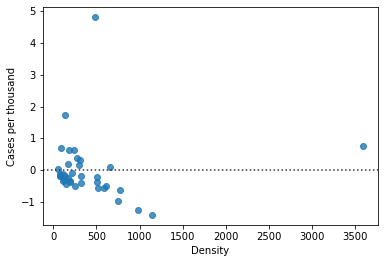

In [49]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
sns.residplot(naijacovid['Density'], naijacovid['Cases per thousand'])
plt.show()

(0.0, 6.382604487336572)

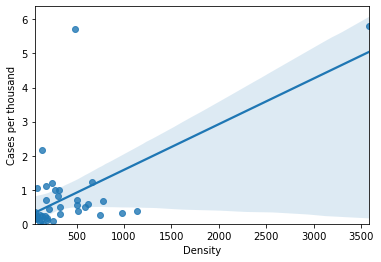

In [50]:
#width = 9
#height = 7
#plt.figure(figsize=(width, height))
sns.regplot(x="Density", y="Cases per thousand", data=naijacovid)
plt.ylim(0,)

In [51]:
lm = LinearRegression()
lm

LinearRegression()

In [52]:
x = naijacovid[['Density']]
y = naijacovid['Cases per thousand']

In [53]:
lm.fit(x,y)

LinearRegression()

In [54]:
Yhat=lm.predict(x)
Yhat[0:5]

array([5.05129334, 0.89852034, 0.48591692, 0.42790145, 1.1290939 ])

In [55]:
lm.intercept_

0.24589949188569205

In [56]:
lm.coef_

array([0.00133944])

Yhat = a+bx

Cases per thousand = 0.24589949188569205 + 0.00133944(density)

In [57]:
naijacovid[["Density", "Cases per thousand"]].corr()

,Density,Cases per thousand
Density,1.000000,0.626533
Cases per thousand,0.626533,1.000000


In [58]:
pearson_coef, p_value = stats.pearsonr(naijacovid['Density'], naijacovid['Cases per thousand'])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
print(pearson_coef)
print(p_value)

0.6265329170562102
4.352603217906003e-05


(0.0, 6.1170242777252)

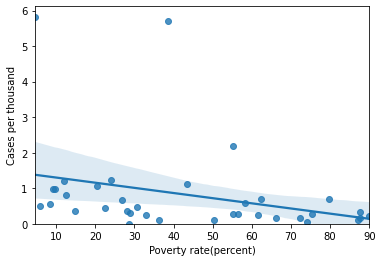

In [59]:
#width = 9
#height = 7
#plt.figure(figsize=(width, height))
sns.regplot(x="Poverty rate(percent)", y="Cases per thousand", data=naijacovid)
plt.ylim(0,)

C:\Users\Greatness\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Poverty rate(percent)', ylabel='Cases per thousand'>

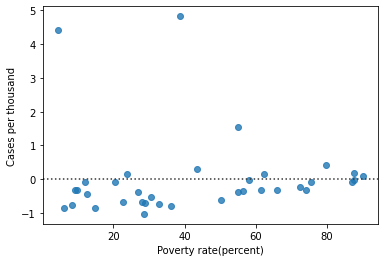

In [60]:
sns.residplot(naijacovid["Poverty rate(percent)"], naijacovid["Cases per thousand"])

In [61]:
lm = LinearRegression()
lm

LinearRegression()

In [62]:
x = naijacovid[['Poverty rate(percent)']]
y = naijacovid['Cases per thousand']

In [63]:
lm.fit(x,y)

LinearRegression()

In [64]:
Yhat = lm.predict(x)
Yhat[0:5]

array([1.3810185 , 0.8847726 , 0.81512403, 0.6468067 , 1.0995224 ],
      dtype=float32)

In [65]:
lm.intercept_

1.4463141

In [66]:
lm.coef_

array([-0.01451012], dtype=float32)

Cases per thousand = 1.4463141 + (-0.01451012* poverty rate)

(0.0, 6.107576256141719)

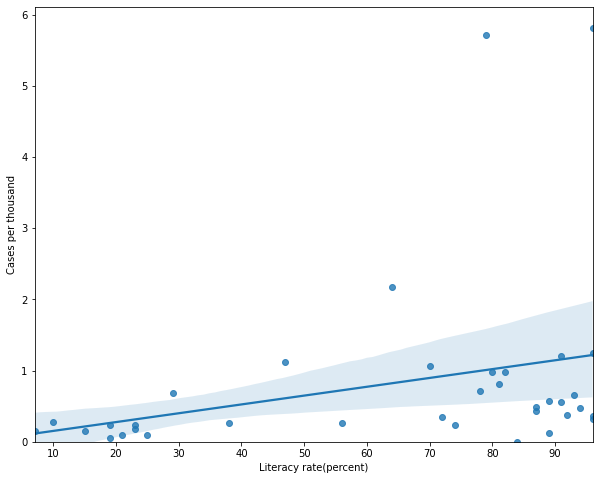

In [67]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="Literacy rate(percent)", y="Cases per thousand", data=naijacovid)
plt.ylim(0,)

C:\Users\Greatness\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Literacy rate(percent)', ylabel='Cases per thousand'>

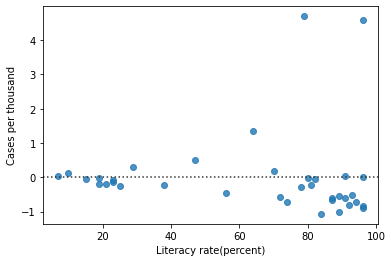

In [68]:
sns.residplot(naijacovid["Literacy rate(percent)"], naijacovid["Cases per thousand"])

In [69]:
lm = LinearRegression()
lm

LinearRegression()

In [70]:
x = naijacovid[['Literacy rate(percent)']]
y = naijacovid['Cases per thousand']

In [71]:
lm.fit(x,y)

LinearRegression()

In [72]:
lm.predict(x)
Yhat[0:5]

array([1.3810185 , 0.8847726 , 0.81512403, 0.6468067 , 1.0995224 ],
      dtype=float32)

In [73]:
lm.intercept_

0.02915204981717301

In [74]:
lm.coef_

array([0.01239377])

Cases per thousand = 0.02915204981717301 + (0.01239377 x literacy rate)

# Polynomial Regression

In [75]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Cases per thousand')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Adj Close')

    plt.show()
    plt.close()

In [76]:
x = naijacovid['Density']
y = naijacovid['Cases per thousand']

In [77]:
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

           2
3.654e-07 x + 0.0001234 x + 0.5689


In [78]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3             2
1.298e-09 x - 5.507e-06 x + 0.004689 x - 0.05527


In [79]:
f = np.polyfit(x, y, 4)
p = np.poly1d(f)
print(p)

            4             3             2
-4.257e-13 x + 3.524e-09 x - 8.312e-06 x + 0.005786 x - 0.1565


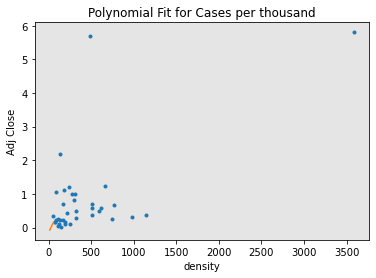

In [80]:
PlotPolly(p, x, y, 'density')

In [81]:
x = naijacovid['Poverty rate(percent)']
y = naijacovid['Cases per thousand']

In [82]:
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

           2
0.0001316 x - 0.02678 x + 1.636


In [83]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

          3            2
-1.6e-05 x + 0.002394 x - 0.1136 x + 2.397


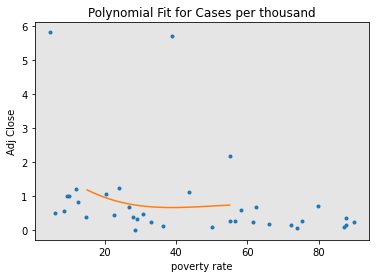

In [84]:
PlotPolly(p, x, y, 'poverty rate')

In [85]:
x = naijacovid['Literacy rate(percent)']
y = naijacovid['Cases per thousand']

In [86]:
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

            2
-0.0001195 x + 0.02541 x - 0.2029


In [87]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3             2
-4.706e-07 x - 4.166e-05 x + 0.02177 x - 0.1616


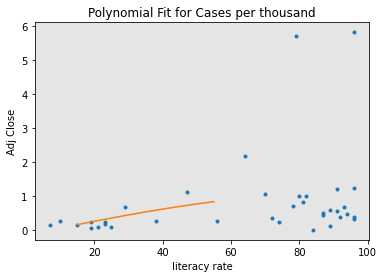

In [88]:
PlotPolly(p, x, y, 'literacy rate')

In [89]:
pearson_coef, p_value = stats.pearsonr(naijacovid['Poverty rate(percent)'], naijacovid['Cases per thousand'])
print(pearson_coef)
print(p_value)

-0.30474786179150026
0.07072841219372414


In [90]:
pearson_coef, p_value = stats.pearsonr(naijacovid['Literacy rate(percent)'], naijacovid['Cases per thousand']) 
print(pearson_coef)
print(p_value)

0.2980240050422845
0.07749636838909779


# Multiple linear regression

In [91]:
Z = naijacovid[['Density', 'Poverty rate(percent)', 'Literacy rate(percent)']]

In [92]:
lm.fit(Z, naijacovid['Cases per thousand'])

LinearRegression()

In [93]:
lm.intercept_

0.3322468279110521

In [94]:
lm.coef_

array([ 0.00127066, -0.0028184 ,  0.00102036])

Cases per thousand = 0.3322468279110521 + (0.00127066 x Density) + (-0.0028184xPoverty rate(percent)) + (0.00102036xLiteracy rate(percent))

In [95]:
B = naijacovid[['Density', 'Literacy rate(percent)']]

In [96]:
lm.fit(B, naijacovid['Cases per thousand'])

LinearRegression()

In [97]:
lm.intercept_

0.09647646569324375

In [98]:
lm.coef_

array([0.00128552, 0.00270786])

Cases per thousand = 0.09647646569324375 + (0.00128552 x Density) + (0.00270786 x Literacy)

In [99]:
D = naijacovid[['Density', 'Poverty rate(percent)']]

In [100]:
lm.fit(D, naijacovid['Cases per thousand'])

LinearRegression()

In [101]:
lm.intercept_

0.4289257872358101

In [102]:
lm.coef_

array([ 0.00127726, -0.00361609])

Cases per thousand = 0.4289257872358101 + (0.00127726 x Density) + (-0.00361609 x poverty)

In [103]:
F = naijacovid[['Literacy rate(percent)', 'Poverty rate(percent)']]

In [104]:
lm.fit(F, naijacovid['Cases per thousand'])

LinearRegression()

In [105]:
lm.intercept_

0.7748777560682321

In [106]:
lm.coef_

array([ 0.00672086, -0.00888508])

Cases per thousand = 0.7748777560682321 + (0.00672086 x literacy) + (-0.00888508 x poverty)

In [107]:
naijacovid

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population Rank,Population (2016),Cases per thousand,Percentage covid cases,Area(square km),Density,Poverty rate(percent),Rank,Literacy rate(percent)
0,Lagos,69698,10704,58529,465,2,12000598,5.807877,0.580788,3345,3587.622720,4.500000,2,96
1,FCT,20339,367,19799,173,29,3564126,5.706588,0.570659,7315,487.235270,38.700001,18,79
2,Kaduna,9203,12,9125,66,3,8252366,1.115195,0.111520,46053,179.192800,43.500000,26,47
3,Plateau,9135,23,9055,57,26,4200442,2.174771,0.217477,30913,135.879468,55.099998,23,64
4,Rivers,9068,1046,7913,109,6,7303924,1.241524,0.124152,11077,659.377449,23.900000,4,96
5,Oyo,7731,509,7070,152,4,7840864,0.985988,0.098599,28454,275.562803,9.800000,17,80
6,Ogun,5145,279,4796,70,16,5217716,0.986064,0.098606,16762,311.282425,9.300000,15,82
7,Edo,5081,117,4777,187,25,4235595,1.199595,0.119960,17802,237.928042,12.000000,9,91
8,Kano,4036,8,3918,110,1,15076892,0.267694,0.026769,20131,748.939049,55.099998,27,38
9,Ondo,3810,217,3523,70,19,4671695,0.815550,0.081555,15500,301.399677,12.500000,16,81


The best model is the polynomial regression for density to the 4th order